# Dietanic_EDA |[출처](https://www.kaggle.com/ash316/eda-to-prediction-dietanic)
###  kaggle의 EDA 필사하기

In [2]:
import numpy as np 
import pandas as pd
import missingno as msno   # 결측치 처리 패키지 

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

p


In [3]:
data = pd.read_csv('data/titanic/train.csv')

print("Data shape{}".format(data.shape))
print("-"*85)
print("Data head\n{}".format(data.head()))
print("-"*85)
print("Data summary\n{}".format(data.describe()))
print("-"*85)
print("Data Info\n{}".format(data.info()))


Data shape(891, 12)
-------------------------------------------------------------------------------------
Data head
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN    

<AxesSubplot:>

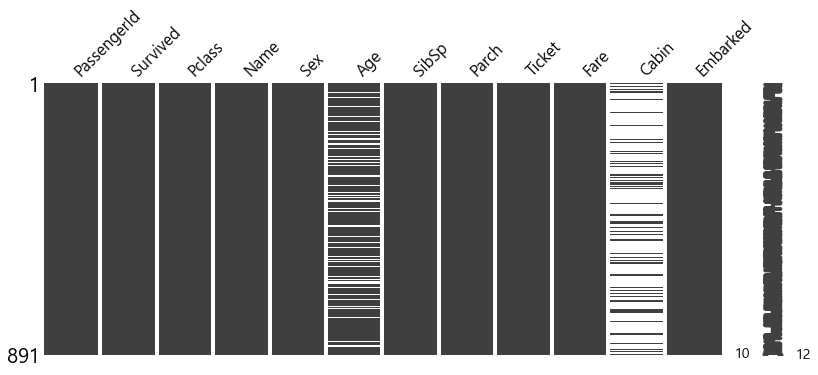

In [4]:
msno.matrix(data,figsize=(12,5))

In [5]:
data.isnull().sum() #checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* Age, Cabin, Embarked 변수에 결측치 존재
* Cabin에 결측치가 매우 많음.
    * 행 개수가 891개인데 결측치 수가 687개임.

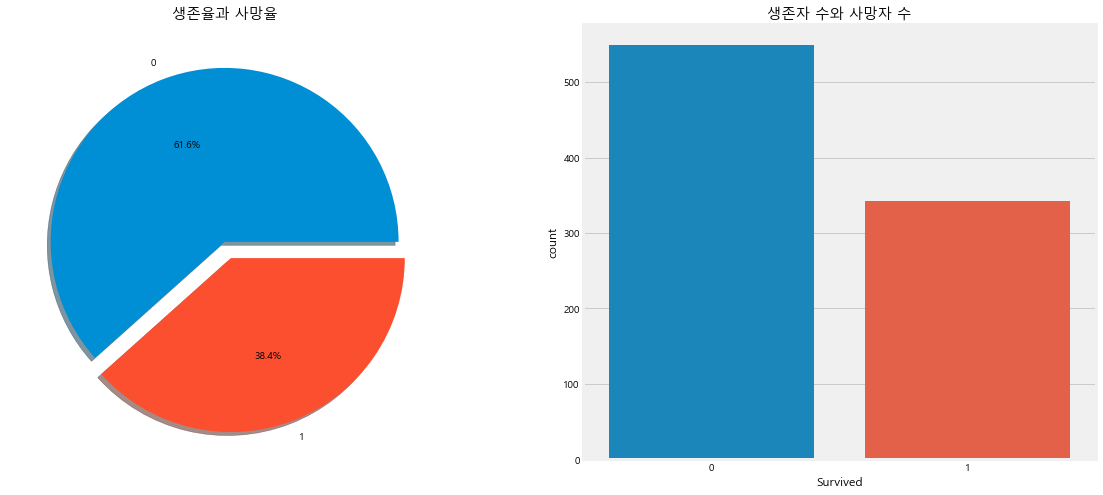

In [6]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('생존율과 사망율')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('생존자 수와 사망자 수')
plt.show()

* 승객 891명 중 약 350명만이 살아남았음.

### 변수의 유형
#### Categorical Features(범주형 변수)
* 두 개 이상의 카테고리를 가지고 각각의 값으로 feature가 카테고리화됨. 
* 순서를 가지지 않는 명목형 변수

#### Ordinal Features(순서형 변수)
* 순서를 가진 변수 

####  Continuous Features(연속형 변수)
* 어떤 변수가 특정 두 지점, 혹은 최댓값과 최솟값 사이에 어떤 값이든 가질 수 있다면 연속형 변수라고 함.
    

### Sex -> 범주형 변수

In [7]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [8]:
data[["Sex"]].value_counts()

Sex   
male      577
female    314
dtype: int64

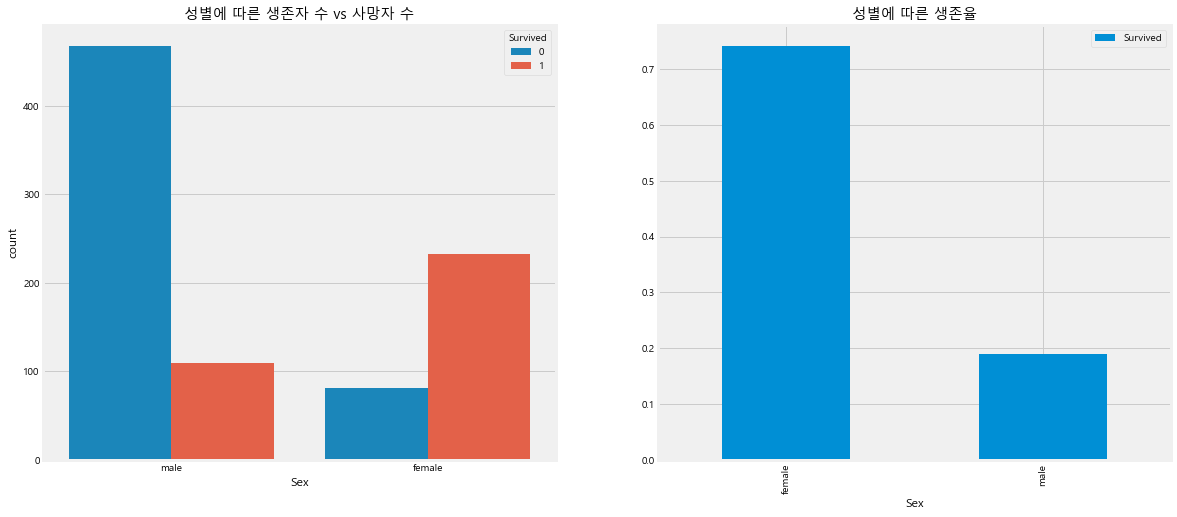

In [9]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[1])
ax[1].set_title('성별에 따른 생존율')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[0])
ax[0].set_title('성별에 따른 생존자 수 vs 사망자 수')
plt.show()

* 배에 타고 있는 사람들의 수는 남자들이 여자들보다 훨씬 더 많음. 
* 하지만 여성의 생존률은 75%인 반면 남성의 생존률은 18-19%로 여자들의 생존률이 훨씬 높음. 
* 이는 추후 중요한 변수를 사용할 수 있음.

### PClass -> Ordinal 변수

In [230]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


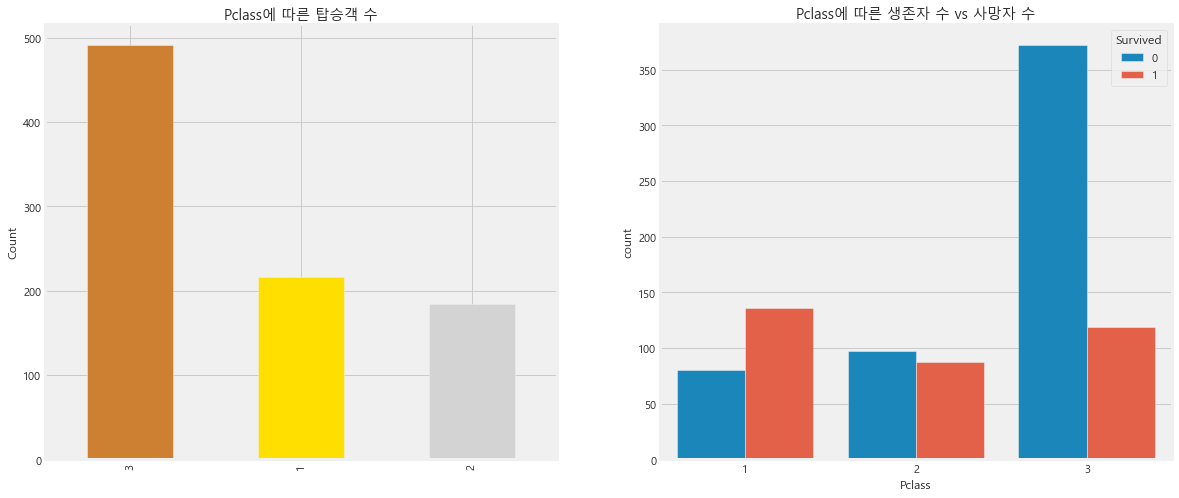

In [231]:
f,ax=plt.subplots(1,2,figsize=(18,8))

data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])

ax[0].set_title('Pclass에 따른 탑승객 수')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass에 따른 생존자 수 vs 사망자 수')
plt.show()

* 3번 클래스의 승객들이 가장 많고 가장 많이 사망했음.

In [70]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

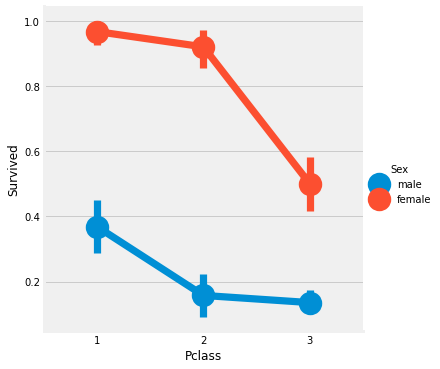

In [71]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

* PClass가 1인 사람들 중 여성은 3명이 죽고 91명이 살았음. 
* PClass와 관계없이 여성들이 구조에 있어서 우선순위를 받음. 

### Age -> 연속형 변수

In [72]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


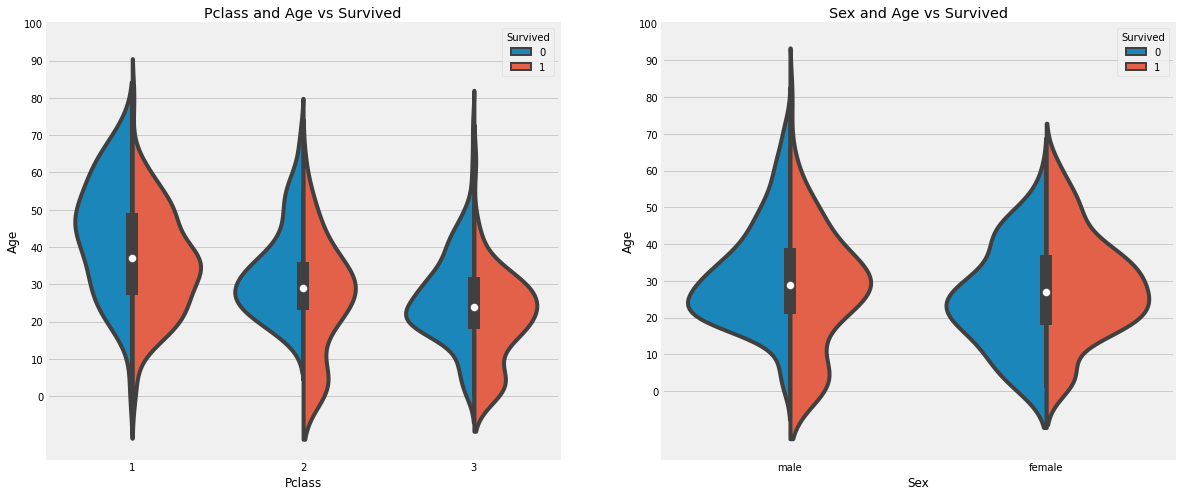

In [73]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=data,split=True,ax=ax[1])  # 바이올린 플롯
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

* PClass에 따라 나이에 차이가 있음. 
    * PClass 등급이 낮아짐에 따라 어린이의 수가 증가
    * 그 중 10세 미만의 생존률이 Pclass1을 제외하고는 양호해보임. 
* 20-50세 사이의 PClass 1 탑승객 생존률이 높고 여성의 경우 매우 높은 것을 보임. 
* 남성은 여성에 비해 나이가 많을수록 더 많이 사망했고 여성은 전체적으로 생존률이 높으나 2040대에 생존률이 높다.
* 177개의 null값이 Age 변수에 존재했음.
    * 이름을 통해 각 그룹의 평균값으로 대체 

In [10]:
data.Name[1:5]

1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [130]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

In [131]:
data['Initial']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Initial, Length: 891, dtype: object

In [132]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


#### 잘못 입력된 값 변경

In [133]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [134]:
data.groupby('Initial')['Age'].mean() #lets check the average age by Initials


Initial
Master     4.616750
Miss      21.887097
Mr        32.798677
Mrs       35.984252
Other     45.888889
Name: Age, dtype: float64

#### 연령의 결측치를 평균값으로 대체 

In [138]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [139]:
data.Age.isnull().any() # 결측치 없음.

False

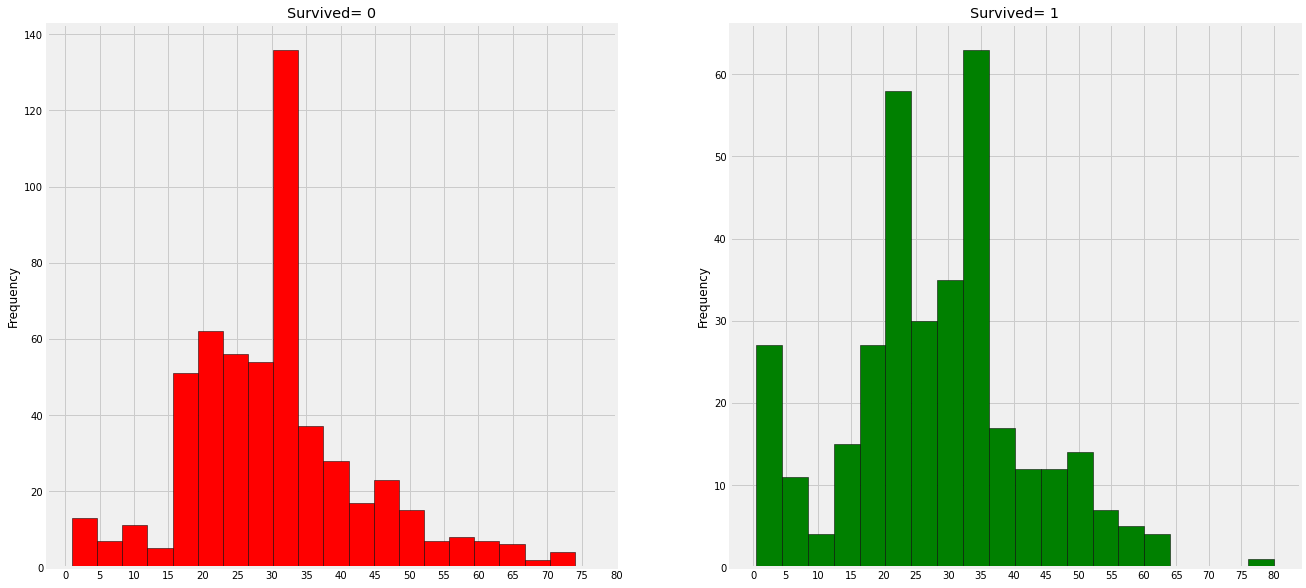

In [140]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

* 생존 여부 별 나이 분포
    * 5세 이하 어린이들이 많이 생존.
* 최고령 구매 승객은 80세.
* 최대 사망자수는 30~40세에 분포해있다. (y축의 범위가 다름 주의)

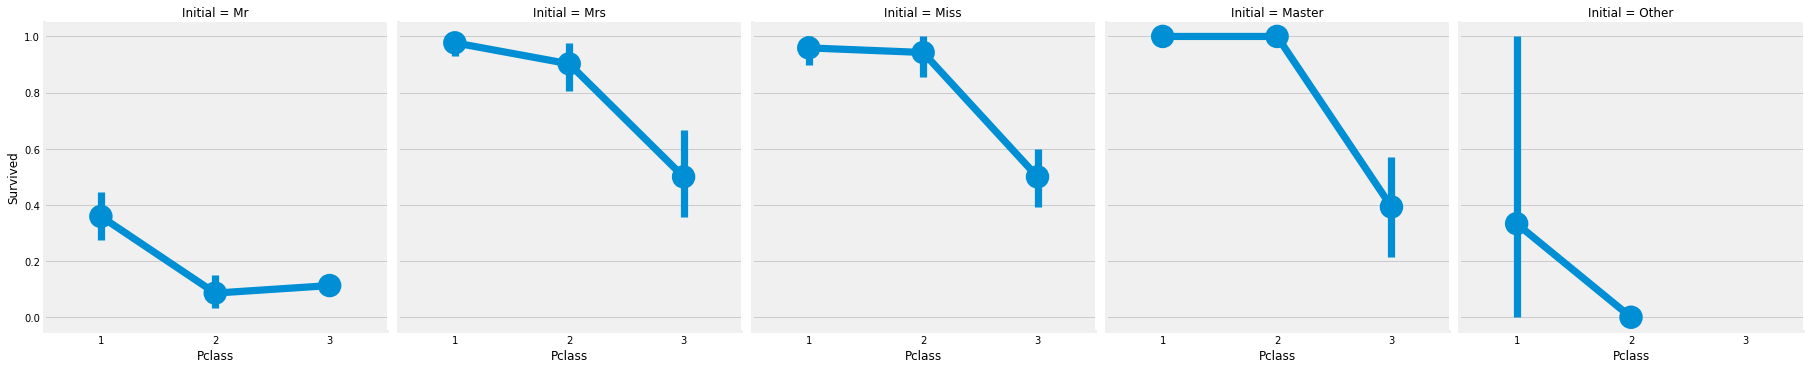

In [141]:
sns.factorplot('Pclass','Survived',col='Initial',data=data)
plt.show()

* PClass에 상관없이 여성과 아이가 구조에서 우선순위를 가지고 있었다는 것은 명확해보임.

### Embarked 변수 -> 범주형 변수

In [142]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

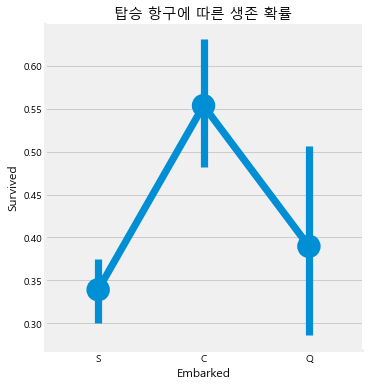

In [155]:
sns.factorplot('Embarked','Survived',data=data, ax=ax)
plt.title("탑승 항구에 따른 생존 확률")
plt.show()

* S의 생존 확률이 가장 낮고 C의 생존 확률이 가장 높음.

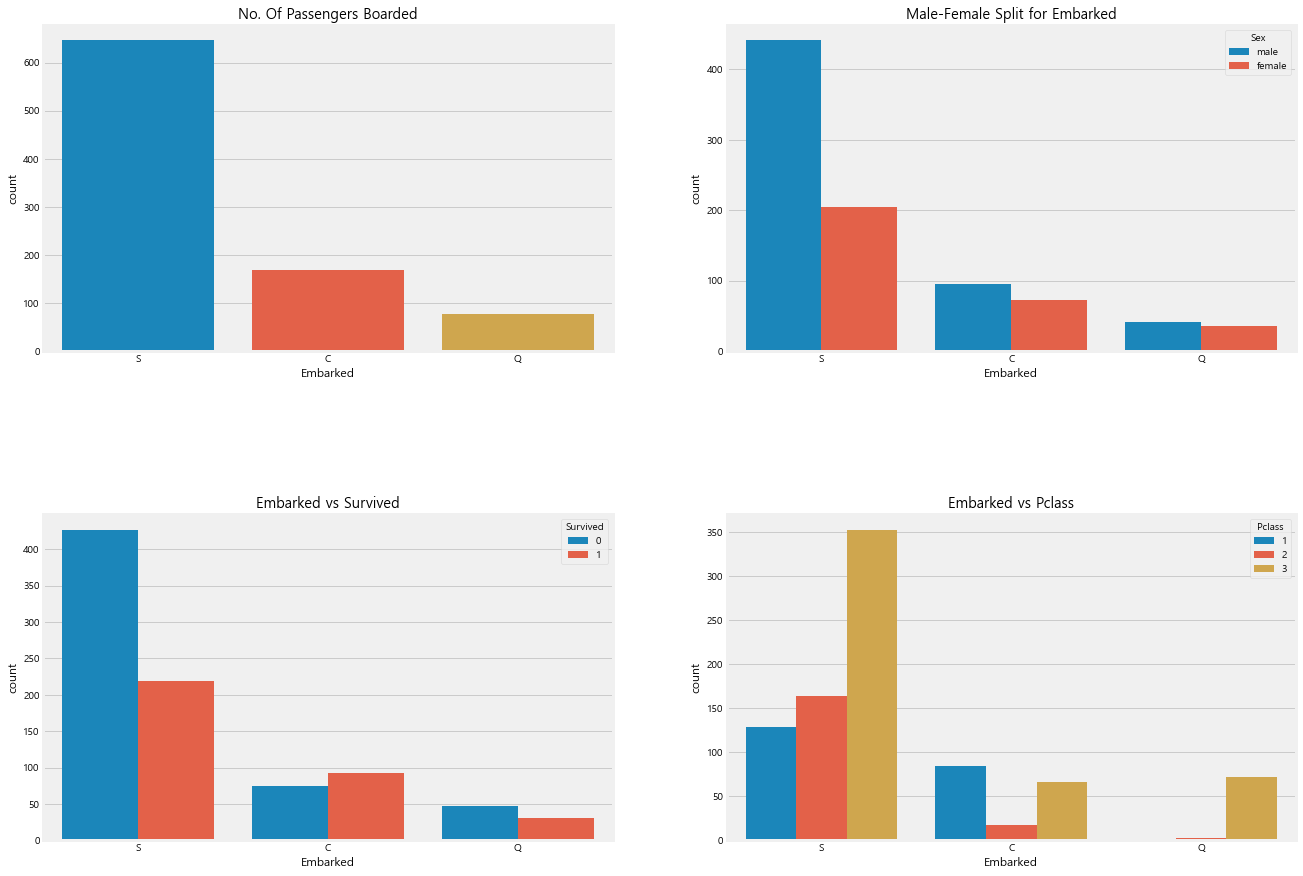

In [156]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

* S에서 가장 많은 승객이 탑승하였고 그 탑승객들의 대부분은 PClass 3.
* C에서 탑승한 승객은 생존률이 사망률보다 높음.
    * C에 PClass1 승객이 많음. 
* Q항구에서 탑승한 승객의 대부분이 PClass 3임. 

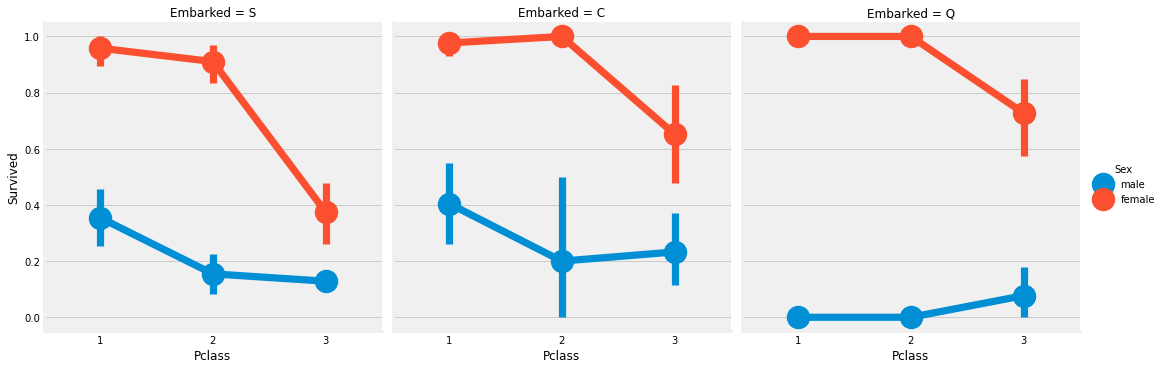

In [86]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

* 탑승 항구 별로 나눠봤을 때 생존확률이 Pclass1, 2는 거의 비슷하게 1임. 
* 탑승 항구가 S일 때는 남성과 여성 모두 생존율이 다른 것들에 비해 낮음.특히 Pclass가 3일 때 매우 낮음.
    * S에 Pclass가 3인 경우가 다른 class에 비해 많았기 때문에 불리해보임.
* Embarked Q는 거의 모두 Pclass3 출신이었기 때문에 남성이 불리해보임. 

#### port에 승객이 대부분 S에 탑승했기 때문에 결측치를 S로 대체 

In [87]:
data['Embarked'].fillna('S',inplace=True)

In [88]:
data.Embarked.isnull().any()   # 결측치 없음. 

False

### SibSp ->이산형 변수
* 탑승객이 혼자인지 가족과 함께 탔는지

#### SibSp: brother, sister, stepbrother, stepsister
#### Spouse: husband, wife

In [157]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


In [159]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


Text(0.5, 1.0, '함께 탄 탑승객 수별 생존률')

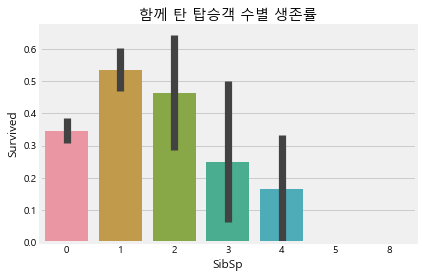

In [168]:
sns.barplot('SibSp', 'Survived', data=data)
plt.title("함께 탄 탑승객 수별 생존률")

* 승객이 혼자 탑승했을 때 생존률이 35%정도 되는 것으로 보임. 
* 형제 자매, 배우자의 수가 증가하면 생존률이 감소함. 
* 가족의 수가 5-8명인 경우에는 생존률이 0%
    * PClass가 모두 3에 속함. -> 모두 사망.

In [170]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


* 구성원이 많은 가족들은 PClass 3에 속함. 

Text(0.5, 1.0, '가족 구성원 수 별 생존률')

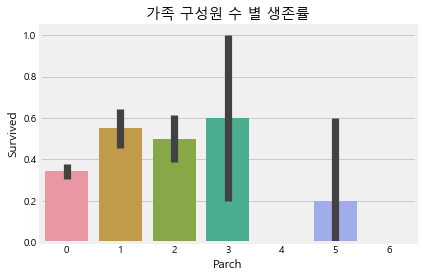

In [174]:
sns.barplot('Parch', 'Survived', data=data)
plt.title("가족 구성원 수 별 생존률")

* 부모님과 아이가 함께 탑승한 승객들의 생존 확률이 높았지만 그 수가 증가할 수록 생존 확률이 낮아짐. 
* 혼자 탑승하는 경우 생존이 어렵고 가족이 4명 이상인 경우 생존률이 감소함.

### Fare -> 연속형 변수
* 요금을 나타내는 변수

In [169]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


* 가장 낮은 요금은 0원

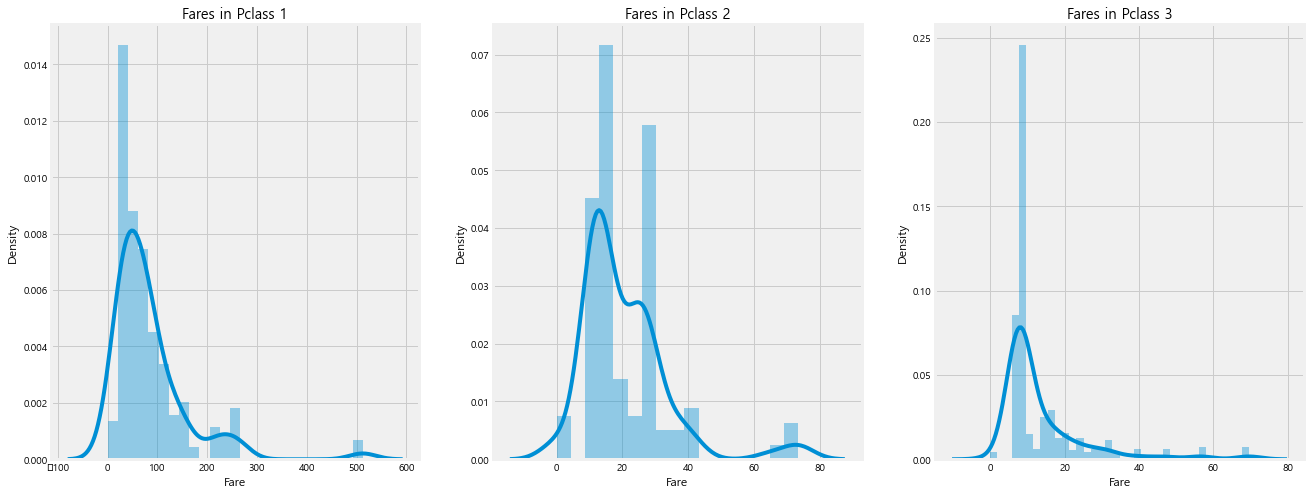

In [175]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

* Pclass 1인 경우 요금의 분포가 넓게 퍼져있음.
* Pclass 2인 경우 요금의 분포가 1에 비해 좁아지고 Pclass 3은 더 좁고 0-30사이에 몰려있음. 
* 연속형 변수이기 때문에 binning을 통해 이산형 값들로 변환

### 전체 featrue eda 탐색 결과
* Sex
    * 남성보다 여성의 생존률이 높다.
* Pclass
    * 1클래스 승객에게 생존률이 높고 3클래스의 생존율이 낮음.
    * 여성들의 생존율이 Pclass1, Pclass2가 거의 1로 확연히 높다.  
* Age
    * 5-10세 미만 아이들은 높은 생존율을 갖고 있음.
    * 15-35세 사이의 승객들이 많이 사망함. 
* Embarked
    * C의 생존율이 사망률보다 높았고 이는 Pclass1번이 많았기 때문.
* Parch+SibSp
    * 1-2명의 형제 자매, 배우자가 같이 탑승하고 있거나 1-3명의 부모와 함께 탑승했을 때 생존률이 혼자 여행을 왔거나 대가족이 탑승한 사람들의 생존률보다 더 높음.

#### 변수별 상관관계

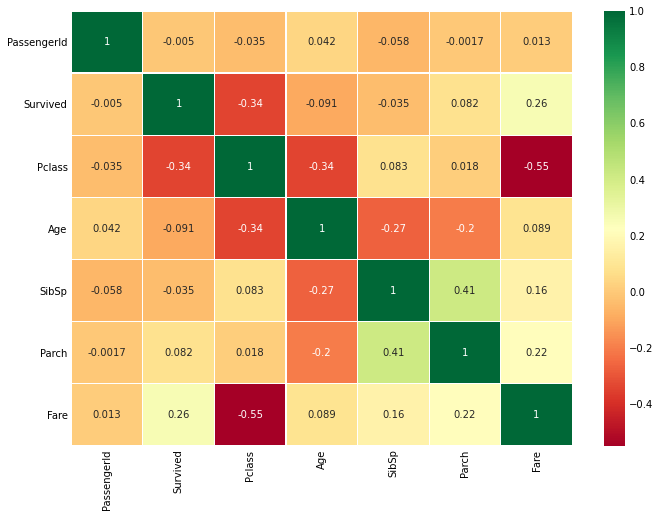

In [96]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

* 종속변수와 가장 높은 상관관계를 보이는 변수는 Pclass 변수로 음의 상관관계를 갖고 있음.
* Pclass와 Fare 변수는 높은 음의 상관관계를 갖고 있음.
* SibSp와 Parchi 변수의 상관관계는 0.41로 다중공선성에 문제되는 상관계수 값은 아님.
* 모든 feature 사용 가능

### Feature Engineering
* 모델링할 때 데이터셋의 모든 변수가 필요한 것은 아님.
* 분명 불필요한 변수가 존재하거나 추가할 변수가 있을 수 있음.

#### Age
* Age 변수는 연속형 변수로 category값으로 binning이나 normalization을 해줘야함. 

In [177]:
data['Age_band']=0

data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4

data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0


* 최고령이 80세였는데 0-80범위를 5개의 빈으로 나눔.
* 80/5 = 16으로 16 사이즈 bin이 생김. 

In [178]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')  #checking the number of passenegers in each band

,Age_band
1,382
2,325
0,104
3,69
4,11


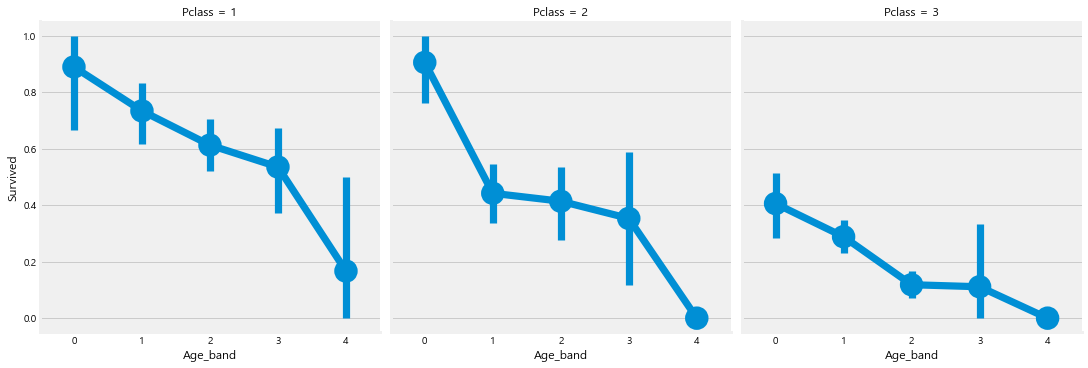

In [179]:
sns.factorplot('Age_band','Survived',data=data,col='Pclass')
plt.show()

* Pclass 등급에 상관없이 나이가 증가함에 따라 생존률은 감소. 

#### Family size & Alone
* Parch변수와 SibSp의 요약을 위한 변수 생성.
* 가족의 수와 생존률의 관계를 체크하기 위한 통합된 데이터.
* Family_size: 가족 구성원 수
* Alone: 혼자인지 아닌지

In [181]:
data['Family_Size'] = 0 
data['Family_Size'] = data['Parch'] + data['SibSp'] # Family_Size 
data['Alone'] = 0
data.loc [data.Family_Size ==0, 'Alone'] = 1 # Alone

Text(0.5, 1.0, '가족구성원 수 별 생존율')

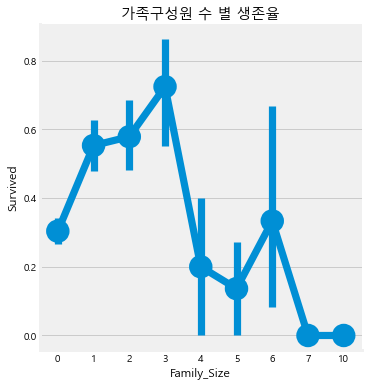

In [185]:
sns.factorplot('Family_Size', 'Survived', data=data, ax=ax[0])
plt.title('가족구성원 수 별 생존율')

Text(0.5, 1.0, '혼자 탑승 유무에 따른 생존률')

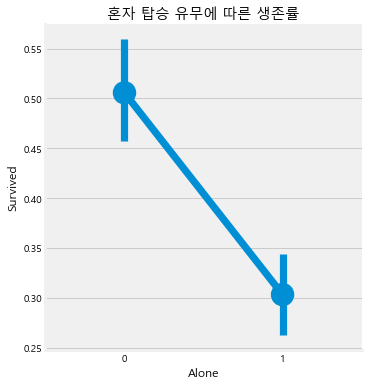

In [187]:
sns.factorplot('Alone', 'Survived', data=data, ax=ax[1])
plt.title('혼자 탑승 유무에 따른 생존률')

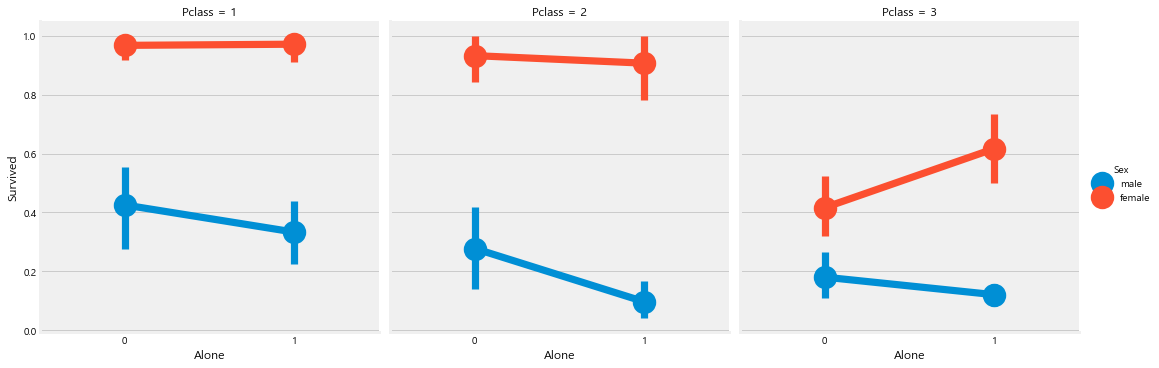

In [188]:
sns.factorplot('Alone','Survived',data=data,hue='Sex',col='Pclass')
plt.show()

* Pclass와 관계없이 혼자 탑승한 경우는 생존률이 낮지만 Pclass3의 여성의 경우 오히려 더 높음.

### Fare_Range
* Fare는 연속형 변수이기 때문에 Ordinary 변수로 변환. Age 변수처럼 binning.

In [189]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)  # 4개 구간으로 데이터 분할 
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


* Fare_Range가 증가할수록 생존률도 증가함.


In [190]:
data['Fare_cat'] = 0
data.loc[data['Fare'] <= 7.91, 'Fare_cat'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare']<=14.454), 'Fare_cat'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare']<=31), 'Fare_cat'] = 2
data.loc[(data['Fare'] > 31) & (data['Fare']<=513), 'Fare_cat'] = 3

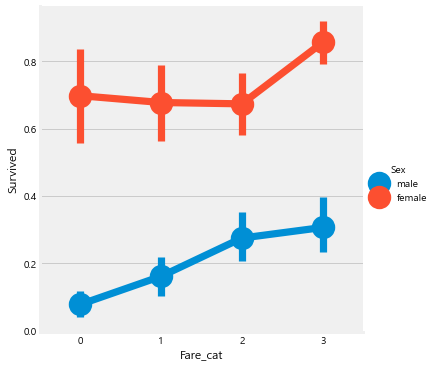

In [191]:
sns.factorplot('Fare_cat', 'Survived', data=data, hue='Sex')
plt.show()

* Fare_cat이 증가할수록 생존률이 증가
* Sex와 함께 모델링에 중요한 Feature가 될 것.

### 문자열을 숫자형으로 변환

In [192]:
data['Sex'].replace(['male','female'], [0, 1], inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2], inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'], [0,1,2,3,4], inplace=True)

### 불필요한 변수 제거 

* Name, PassengerId
* Age: Age band를 만들었으므로 삭제 
* Fare_Range, Fare: Fare_cat 변수를 만들었으므로 삭제 
* Cabin: 결측치가 너무 많고 많은 승객에 따라 cabin값이 많기 때문에 사용하지 않음.


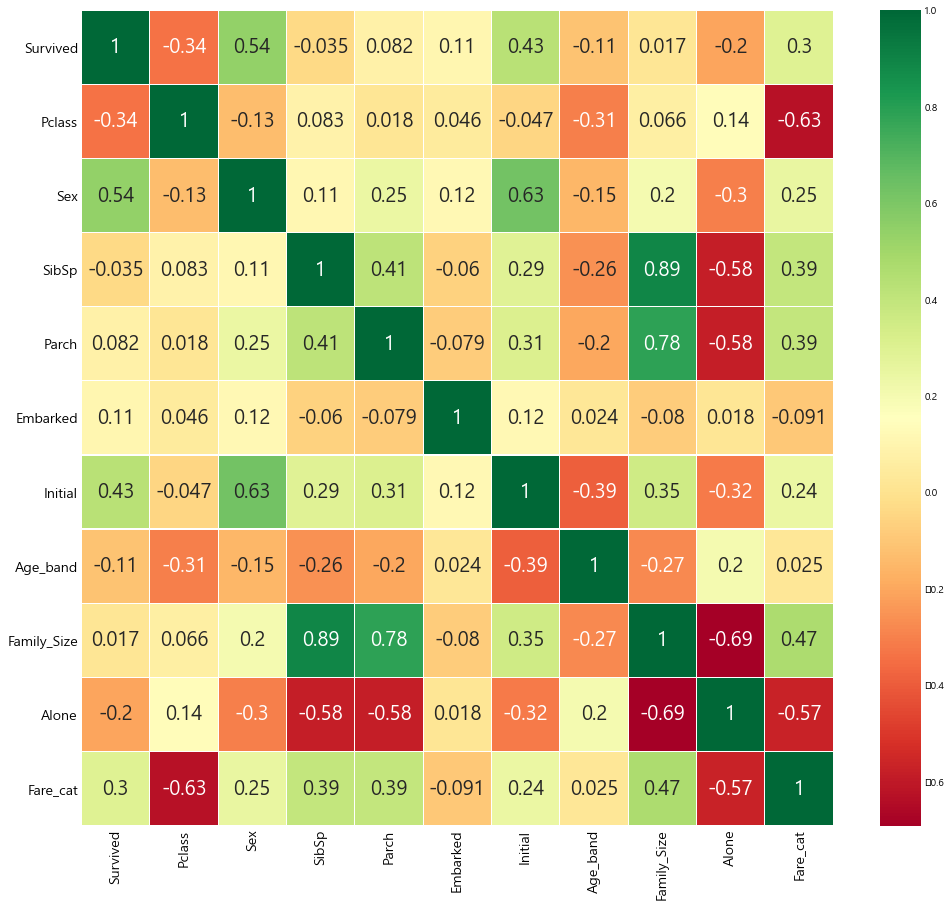

In [193]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis=1, inplace=True)

sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size' : 20})
fig = plt.gcf()
fig.set_size_inches(15, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

* Survived와 관계가 가장 큰 변수는 Sex이고 그 다음으로 Initial변수.
* SibSp, Family_size, Parch가 양의 상관관계를, Alone, Family size가 음의 상관관계를 갖고 있음. 

### Modeling

In [194]:
## 필요한 머신러닝 패키지들을 불러옵니다
from sklearn.linear_model import LogisticRegression # logistic regression
from sklearn import svm # support vector machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.naive_bayes import GaussianNB # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree

from sklearn.model_selection import train_test_split # training and testing data split 
from sklearn import metrics # accuracy measure
from sklearn.metrics import confusion_matrix # confusion matrix

In [195]:
train, test = train_test_split(data, test_size = 0.3, random_state = 0, stratify=data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

In [196]:
model = svm.SVC(kernel = 'rbf', C = 1, gamma = 0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is ', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is  0.835820895522388


In [197]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.8171641791044776


In [198]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('Accuracy of the Logistic Regression is ', metrics.accuracy_score(prediction3, test_Y))

Accuracy of the Logistic Regression is  0.8134328358208955


In [199]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('Accuracy ofthe Decision Tree is ', metrics.accuracy_score(prediction4, test_Y))

Accuracy ofthe Decision Tree is  0.7985074626865671


In [200]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('Accuracy of the KNN is ', metrics.accuracy_score(prediction5, test_Y))

Accuracy of the KNN is  0.832089552238806


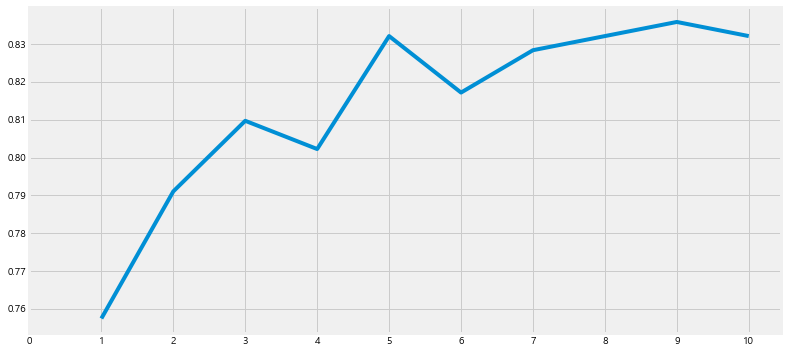

Accuracies for different values of n are :  [0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] with the max values as 0.835820895522388


In [201]:
a_index = list(range(1,11))
a = pd.Series()
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()
print('Accuracies for different values of n are : ', a.values, 'with the max values as', a.values.max())

In [202]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('The accuracy of the Naive Bayes is ', metrics.accuracy_score(prediction6, test_Y))

The accuracy of the Naive Bayes is  0.8134328358208955


In [203]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('The accuracy of the Random Forests is ', metrics.accuracy_score(prediction7, test_Y))

The accuracy of the Random Forests is  0.8283582089552238


In [204]:
from sklearn.model_selection import KFold # K-Fold Cross Validation 
from sklearn.model_selection import cross_val_score # 점수 평가
from sklearn.model_selection import cross_val_predict # 예측

kfold = KFold(n_splits = 10, random_state = 22) # k = 10 , 데이터셋을  동일 크기의 10개의 서브셋으로 나눕니다.
xyz = []
accuracy = []
std = []
classifiers = ['Linear Svm', 'Radial Svm', 'Logistic Regression', 'KNN', 'Decision Tree',
              'Naive Bayes', 'Random Forest']
models = [svm.SVC(kernel = 'linear'), svm.SVC(kernel = 'rbf'), LogisticRegression(), 
                 KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(), GaussianNB(),
                 RandomForestClassifier(n_estimators=100)]
for i in models :
    model = i 
    cv_result = cross_val_score(model, X, Y, cv = kfold, scoring = 'accuracy')
    cv_result = cv_result 
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

new_models_dataframe2 = pd.DataFrame({'CV Mean' : xyz, 'Std' : std}, index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.024061
KNN,0.813783,0.041210
Decision Tree,0.809238,0.029453
Naive Bayes,0.801386,0.028999
Random Forest,0.813720,0.033222


<AxesSubplot:>

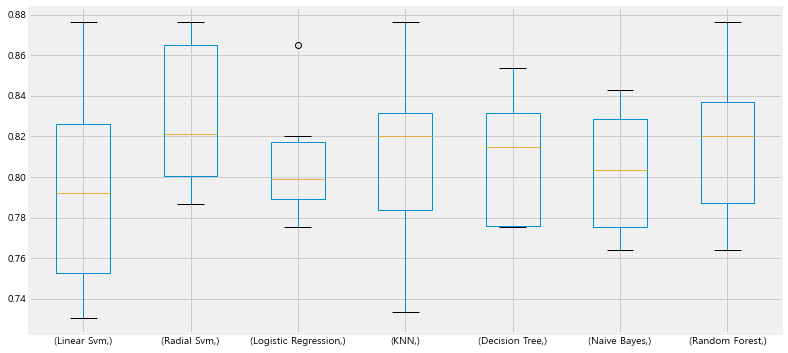

In [205]:
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy, index = [classifiers])
box.T.boxplot()

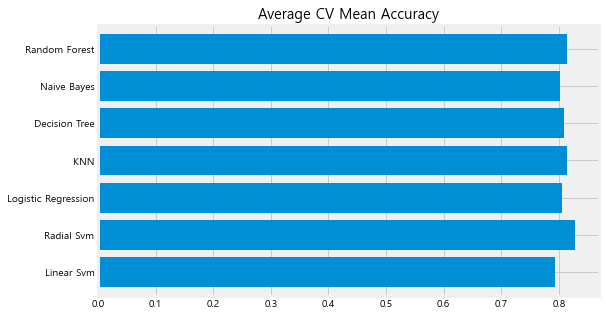

In [206]:
new_models_dataframe2['CV Mean'].plot.barh(width = 0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

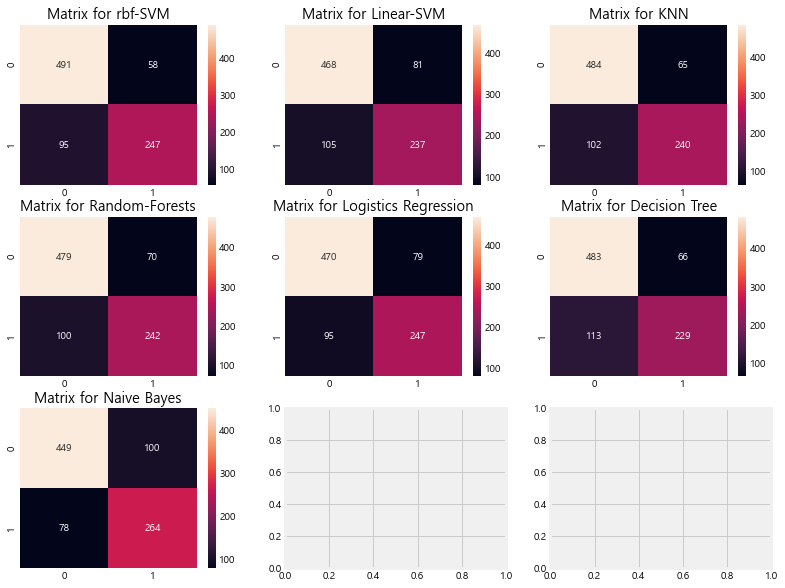

In [207]:
f, ax = plt.subplots(3, 3, figsize=(12,10))

y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[0,0], annot=True, fmt = '2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[0,1], annot=True, fmt = '2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[0,2], annot=True, fmt = '2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[1,0], annot=True, fmt = '2.0f')
ax[1,0].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[1,1], annot=True, fmt = '2.0f')
ax[1,1].set_title('Matrix for Logistics Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[1,2], annot=True, fmt = '2.0f')
ax[1,2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[2,0], annot=True, fmt = '2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2, wspace = 0.2)
plt.show()